# Clasificación K-Nearest Neighbors (KNN) de Busetas

## CELDA 1: Importar Librerías y Cargar Datos
Prepara el entorno de trabajo importando todas las librerías necesarias (`pandas`, `numpy`, módulos de `sklearn`, etc.) para el preprocesamiento y el modelado KNN. Luego, carga el archivo de datos `"flota_vinculada_20250916_limpio.xlsx"` en un DataFrame. Confirma las dimensiones iniciales del dataset, que son **10.493 registros** con **18 columnas**.

In [20]:
# ============================================================
# CELDA 1: IMPORTAR LIBRERÍAS Y CARGAR DATOS
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel
archivo = "flota_vinculada_20250916_limpio.xlsx"

try:
    df = pd.read_excel(archivo)
    print("¡Archivo cargado exitosamente!")
    print(f"\nDimensiones del dataset: {df.shape}")
    print("\nPrimeras 5 filas:")
    display(df.head())
    print("\nInformación del dataset:")
    print(df.info())
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{archivo}'. Asegúrate de que esté en la misma carpeta.")

¡Archivo cargado exitosamente!

Dimensiones del dataset: (10493, 18)

Primeras 5 filas:


,Fecha_matricula,Concesionario_operacion,Concesionario_provision,Zona,Fase,Componente,Estatus_vinculacion,Combustible,Modelo,Codigo_bus,Fecha_vinculacion,Accesible,Edad,Matricula,Descripcion_estado_vinculacion,Descripcion_nivel_emision,Descripcion_tipo,Estado
0,2020-02-03,CAPITALBUS S.A.S,MASIVO BOGOT S.A.S,AMERICAS,FASE IV,TRONCAL,Referente,GNV,2020,K1411,2020-02-28,PLATAFORMA ALTA,5,GUW531,Vinculado,EURO VI,BIARTICULADO,Buen estado
1,2020-02-03,CAPITALBUS S.A.S,MASIVO BOGOT S.A.S,AMERICAS,FASE IV,TRONCAL,Referente,GNV,2020,K1414,2020-02-28,PLATAFORMA ALTA,5,GUW534,Vinculado,EURO VI,BIARTICULADO,Buen estado
2,2020-02-03,CAPITALBUS S.A.S,MASIVO BOGOT S.A.S,AMERICAS,FASE IV,TRONCAL,Referente,GNV,2020,K1469,2020-02-28,PLATAFORMA ALTA,5,GUW589,Vinculado,EURO VI,BIARTICULADO,Buen estado
3,2020-02-03,CAPITALBUS S.A.S,MASIVO BOGOT S.A.S,AMERICAS,FASE IV,TRONCAL,Referente,GNV,2020,K1403,2020-02-28,PLATAFORMA ALTA,5,GUW523,Vinculado,EURO VI,BIARTICULADO,Buen estado
4,2020-02-03,CAPITALBUS S.A.S,MASIVO BOGOT S.A.S,AMERICAS,FASE IV,TRONCAL,Referente,GNV,2020,K1484,2020-02-28,PLATAFORMA ALTA,5,GUW604,Vinculado,EURO VI,BIARTICULADO,Buen estado



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha_matricula                 10493 non-null  datetime64[ns]
 1   Concesionario_operacion         10493 non-null  object        
 2   Concesionario_provision         10493 non-null  object        
 3   Zona                            10493 non-null  object        
 4   Fase                            10493 non-null  object        
 5   Componente                      10493 non-null  object        
 6   Estatus_vinculacion             10493 non-null  object        
 7   Combustible                     10493 non-null  object        
 8   Modelo                          10493 non-null  int64         
 9   Codigo_bus                      10493 non-null  object        
 10  Fecha_vinculacion               10493 non-nu

## CELDA 2: Exploración Inicial de Datos
Realiza un análisis descriptivo inicial. Muestra la lista de columnas. Analiza la distribución de la variable objetivo (**'Estado'**), identificando las 5 categorías de clasificación. Explora las estadísticas de las características clave (**'Edad'** y **'Modelo'**). Finalmente, verifica la **ausencia de valores nulos** en las columnas esenciales para el modelo.


In [21]:
# ============================================================
# CELDA 2: EXPLORACIÓN INICIAL DE DATOS
# ============================================================

# Ver las columnas disponibles
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

# Verificar valores únicos en las columnas clave
print("\n" + "="*60)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (Estado)")
print("="*60)
print("\nValores únicos en 'Estado':")
print(df['Estado'].value_counts())

print("\n" + "="*60)
print("ANÁLISIS DE LAS CARACTERÍSTICAS")
print("="*60)

print("\nEstadísticas de 'Edad':")
print(df['Edad'].describe())

print("\nRango de 'Modelo':")
print(f"Mínimo: {df['Modelo'].min()}, Máximo: {df['Modelo'].max()}")
print(df['Modelo'].value_counts().head(10))

print("\nValores únicos en 'Descripcion_nivel_emision':")
print(df['Descripcion_nivel_emision'].value_counts())

# Verificar valores nulos
print("\n" + "="*60)
print("VALORES NULOS POR COLUMNA")
print("="*60)
print(df[['Estado', 'Edad', 'Modelo', 'Descripcion_nivel_emision']].isnull().sum())

Columnas disponibles en el dataset:
['Fecha_matricula', 'Concesionario_operacion', 'Concesionario_provision', 'Zona', 'Fase', 'Componente', 'Estatus_vinculacion', 'Combustible', 'Modelo', 'Codigo_bus', 'Fecha_vinculacion', 'Accesible', 'Edad', 'Matricula', 'Descripcion_estado_vinculacion', 'Descripcion_nivel_emision', 'Descripcion_tipo', 'Estado']

ANÁLISIS DE LA VARIABLE OBJETIVO (Estado)

Valores únicos en 'Estado':
Estado
Necesita cambio    7124
Buen estado        2017
Estandar            541
Critico             439
Excelente           372
Name: count, dtype: int64

ANÁLISIS DE LAS CARACTERÍSTICAS

Estadísticas de 'Edad':
count    10493.000000
mean         7.703612
std          3.698283
min          0.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         17.000000
Name: Edad, dtype: float64

Rango de 'Modelo':
Mínimo: 2007, Máximo: 2025
Modelo
2014    2935
2021    1800
2020    1624
2015    1266
2022    1007
2023     347
2013     334
2019     312
2012  

## CELDA 3: Verificación de Limpieza y Distribución de Clases
Confirma que no se eliminaron registros. Muestra la **distribución de clases** de la columna **'Estado'** en términos de conteos y porcentajes. Este análisis es crucial para identificar el **desequilibrio de clases** existente en el dataset, donde la clase 'Necesita cambio' es la más predominante.

Registros después de eliminar nulos: 10493
Registros eliminados: 0

Distribución de 'Estado' después de limpieza:
Estado
Necesita cambio    7124
Buen estado        2017
Estandar            541
Critico             439
Excelente           372
Name: count, dtype: int64

Porcentajes:
Estado
Necesita cambio    67.892881
Buen estado        19.222339
Estandar            5.155818
Critico             4.183742
Excelente           3.545221
Name: proportion, dtype: float64


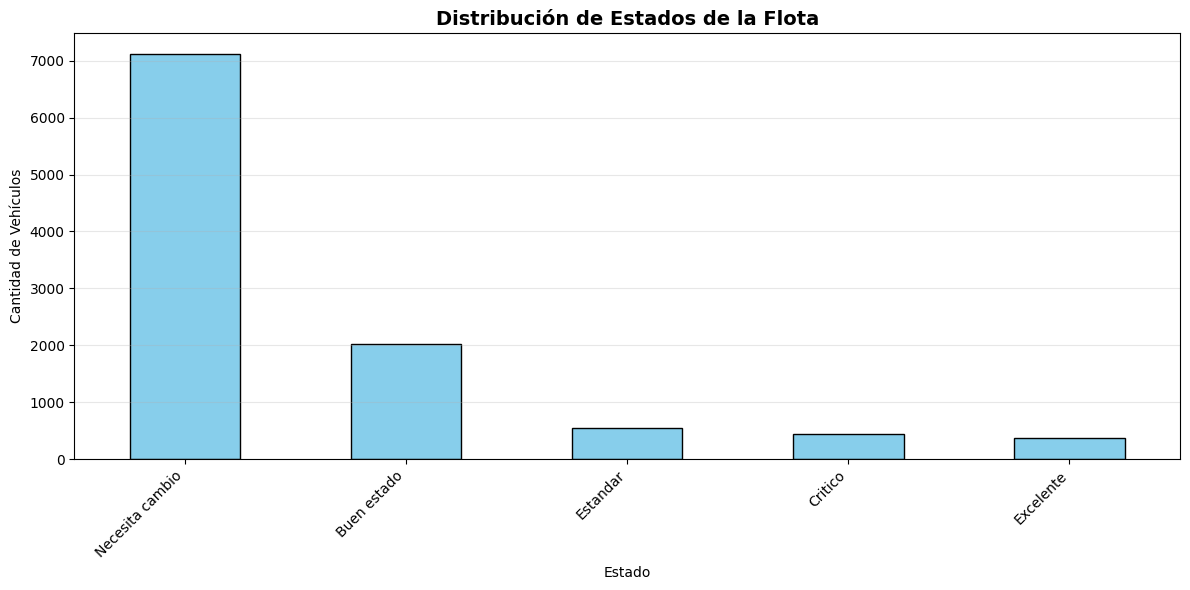

In [22]:
# ============================================================
# CELDA 3: LIMPIEZA Y PREPARACIÓN DE DATOS
# ============================================================

# Crear una copia del dataframe para no modificar el original
df_clean = df.copy()

# Eliminar filas con valores nulos en las columnas que vamos a usar
columnas_necesarias = ['Estado', 'Edad', 'Modelo', 'Descripcion_nivel_emision']
df_clean = df_clean.dropna(subset=columnas_necesarias)

print(f"Registros después de eliminar nulos: {len(df_clean)}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")

# Verificar la distribución de la variable objetivo
print("\nDistribución de 'Estado' después de limpieza:")
print(df_clean['Estado'].value_counts())
print("\nPorcentajes:")
print(df_clean['Estado'].value_counts(normalize=True) * 100)

# Visualizar la distribución
plt.figure(figsize=(12, 6))
df_clean['Estado'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Estados de la Flota', fontsize=14, fontweight='bold')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## CELDA 4: Definición y Codificación de Características
Separa el dataset en la matriz de características **X** y la variable objetivo **y**. Aplica **One-Hot Encoding** a la característica categórica **'Descripcion_nivel_emision'**, transformándola en múltiples columnas binarias. Concatena las características numéricas originales (**'Edad'**, **'Modelo'**) con las nuevas columnas *dummy* codificadas para crear la matriz final **X** lista para escalar.

In [23]:
# ============================================================
# CELDA 4: DEFINIR VARIABLE OBJETIVO (y) Y CARACTERÍSTICAS (X)
# ============================================================

# Definir la variable objetivo
y = df_clean['Estado']

# Definir las características
# Columnas numéricas
columnas_numericas = ['Edad', 'Modelo']

# Columnas categóricas
columnas_categoricas = ['Descripcion_nivel_emision']

print("="*60)
print("PREPARACIÓN DE CARACTERÍSTICAS")
print("="*60)

# Crear DataFrame con características numéricas
X_numericas = df_clean[columnas_numericas]
print(f"\nCaracterísticas numéricas: {columnas_numericas}")
print(X_numericas.head())

# Preparar características categóricas con One-Hot Encoding
X_categoricas = df_clean[columnas_categoricas]
print(f"\nCaracterísticas categóricas: {columnas_categoricas}")
print(X_categoricas.head())

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categoricas_encoded = pd.DataFrame(
    encoder.fit_transform(X_categoricas),
    columns=encoder.get_feature_names_out(columnas_categoricas),
    index=X_categoricas.index
)

print("\nCaracterísticas categóricas después de One-Hot Encoding:")
print(X_categoricas_encoded.head())
print(f"\nColumnas generadas: {X_categoricas_encoded.columns.tolist()}")

# Combinar características numéricas y categóricas
X = pd.concat([
    X_numericas.reset_index(drop=True), 
    X_categoricas_encoded.reset_index(drop=True)
], axis=1)

print("\n" + "="*60)
print("DATASET FINAL DE CARACTERÍSTICAS (X)")
print("="*60)
print(f"Dimensiones: {X.shape}")
print("\nPrimeras filas:")
print(X.head())
print("\nColumnas finales:")
print(X.columns.tolist())

PREPARACIÓN DE CARACTERÍSTICAS

Características numéricas: ['Edad', 'Modelo']
   Edad  Modelo
0     5    2020
1     5    2020
2     5    2020
3     5    2020
4     5    2020

Características categóricas: ['Descripcion_nivel_emision']
  Descripcion_nivel_emision
0                   EURO VI
1                   EURO VI
2                   EURO VI
3                   EURO VI
4                   EURO VI

Características categóricas después de One-Hot Encoding:
   Descripcion_nivel_emision_(<) A EURO IV  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Descripcion_nivel_emision_CERO EMISIONES  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                           

## CELDA 5: Estandarización de Datos
Inicializa y aplica el **`StandardScaler`** a la matriz de características **X**. Este paso es fundamental para el algoritmo KNN, ya que estandariza los datos (media=0, desviación estándar=1), asegurando que la distancia euclidiana no esté sesgada por las características con rangos numéricos más grandes.

In [24]:
# ============================================================
# CELDA 5: ESTANDARIZACIÓN DE DATOS
# ============================================================

# K-NN es sensible a la escala de las variables
# Estandarizamos para que todas tengan media 0 y desviación estándar 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("="*60)
print("ESTANDARIZACIÓN COMPLETADA")
print("="*60)
print(f"\nForma de X_scaled: {X_scaled.shape}")
print("\nPrimeras 5 filas estandarizadas:")
print(X_scaled[:5])

# Verificar estadísticas después de estandarización
print("\nEstadísticas después de estandarización:")
print(f"Media aproximada: {np.mean(X_scaled, axis=0)[:5]}")  # Debe ser cercana a 0
print(f"Desviación estándar aproximada: {np.std(X_scaled, axis=0)[:5]}")  # Debe ser cercana a 1

ESTANDARIZACIÓN COMPLETADA

Forma de X_scaled: (10493, 9)

Primeras 5 filas estandarizadas:
[[-0.73107993  0.72577433 -0.17934894 -0.40618074 -0.33715002 -0.81225585
  -0.18188082 -0.26756131  1.83582744]
 [-0.73107993  0.72577433 -0.17934894 -0.40618074 -0.33715002 -0.81225585
  -0.18188082 -0.26756131  1.83582744]
 [-0.73107993  0.72577433 -0.17934894 -0.40618074 -0.33715002 -0.81225585
  -0.18188082 -0.26756131  1.83582744]
 [-0.73107993  0.72577433 -0.17934894 -0.40618074 -0.33715002 -0.81225585
  -0.18188082 -0.26756131  1.83582744]
 [-0.73107993  0.72577433 -0.17934894 -0.40618074 -0.33715002 -0.81225585
  -0.18188082 -0.26756131  1.83582744]]

Estadísticas después de estandarización:
Media aproximada: [-2.16690818e-17  2.27958741e-14 -7.58417863e-17 -1.62518114e-17
 -4.33381636e-17]
Desviación estándar aproximada: [1. 1. 1. 1. 1.]


## CELDA 6: División de Datos en Entrenamiento y Prueba
Utiliza **`train_test_split`** para dividir el conjunto de datos estandarizado en un conjunto de **entrenamiento (80%)** y un conjunto de **prueba (20%)**. El uso del parámetro **`stratify=y`** garantiza que la proporción de las 5 clases de la variable objetivo sea idéntica en ambos subconjuntos, manteniendo la representatividad.

In [25]:
# ============================================================
# CELDA 6: DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA
# ============================================================

# Dividir en 80% entrenamiento y 20% prueba
# stratify=y asegura que la proporción de clases se mantenga en ambos conjuntos

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("="*60)
print("DIVISIÓN DE DATOS")
print("="*60)
print(f"\nConjunto de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(df_clean)*100:.1f}%)")

print("\nDistribución de clases en conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nDistribución de clases en conjunto de prueba:")
print(y_test.value_counts())

DIVISIÓN DE DATOS

Conjunto de entrenamiento: 8394 registros (80.0%)
Conjunto de prueba: 2099 registros (20.0%)

Distribución de clases en conjunto de entrenamiento:
Estado
Necesita cambio    5699
Buen estado        1613
Estandar            433
Critico             351
Excelente           298
Name: count, dtype: int64

Distribución de clases en conjunto de prueba:
Estado
Necesita cambio    1425
Buen estado         404
Estandar            108
Critico              88
Excelente            74
Name: count, dtype: int64


##  CELDA 7: Entrenamiento y Evaluación Inicial ($K=5$)
Inicializa, entrena y evalúa el primer modelo **`KNeighborsClassifier`** utilizando un valor inicial de **$K=5$**. Se calcula la **Exactitud (Accuracy)**. Se genera el **Reporte de Clasificación** completo (precisión, *recall* y F1-score por clase). Finalmente, se visualiza la **Matriz de Confusión** para entender gráficamente el desempeño del modelo y sus errores.

ENTRENAMIENTO CON K=5

✓ Exactitud (Accuracy) del modelo: 0.9747 (97.47%)

REPORTE DE CLASIFICACIÓN
                 precision    recall  f1-score   support

    Buen estado       0.96      0.91      0.94       404
        Critico       1.00      1.00      1.00        88
       Estandar       0.96      1.00      0.98       108
      Excelente       1.00      1.00      1.00        74
Necesita cambio       0.98      0.99      0.98      1425

       accuracy                           0.97      2099
      macro avg       0.98      0.98      0.98      2099
   weighted avg       0.97      0.97      0.97      2099


MATRIZ DE CONFUSIÓN


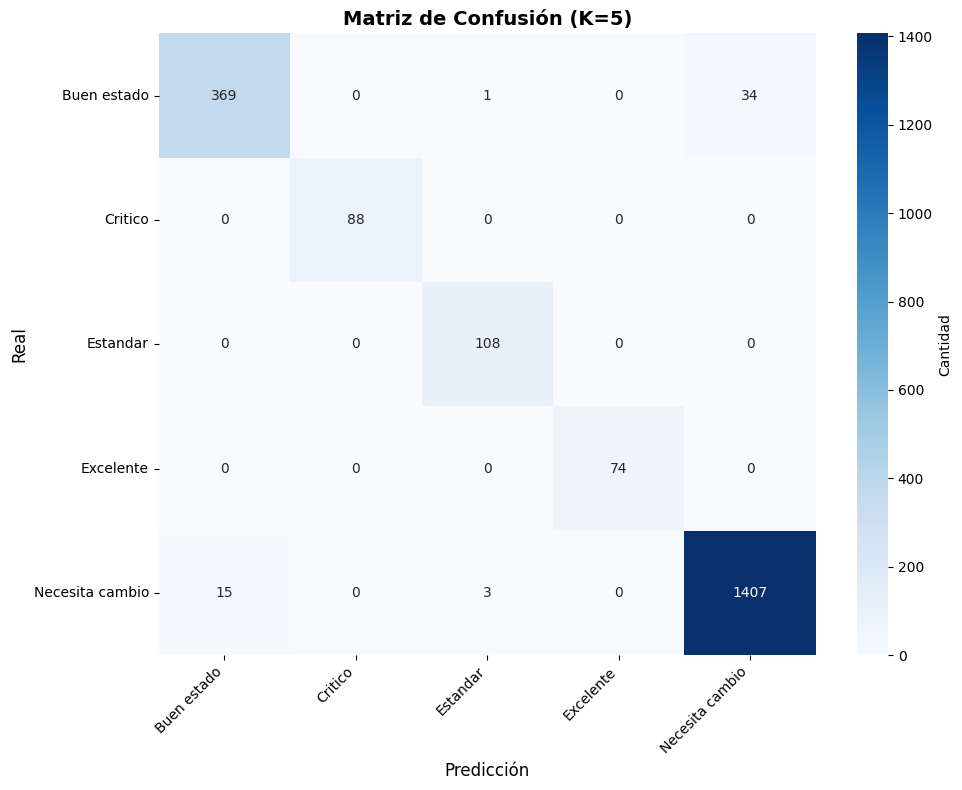


Análisis de errores más comunes:

Clases más confundidas (valores fuera de la diagonal):
  - 1 vehículos 'Buen estado' clasificados como 'Estandar'
  - 34 vehículos 'Buen estado' clasificados como 'Necesita cambio'
  - 15 vehículos 'Necesita cambio' clasificados como 'Buen estado'
  - 3 vehículos 'Necesita cambio' clasificados como 'Estandar'


In [26]:
# ============================================================
# CELDA 7: ENTRENAMIENTO Y EVALUACIÓN DEL MODELO K-NN
# ============================================================

# Probar con K=5 inicialmente
k = 5
print("="*60)
print(f"ENTRENAMIENTO CON K={k}")
print("="*60)

# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✓ Exactitud (Accuracy) del modelo: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Reporte de clasificación
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN")
print("="*60)
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\n" + "="*60)
print("MATRIZ DE CONFUSIÓN")
print("="*60)

# Obtener las clases únicas en orden
clases = sorted(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=clases)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clases, 
            yticklabels=clases,
            cbar_kws={'label': 'Cantidad'})
plt.title(f'Matriz de Confusión (K={k})', fontsize=14, fontweight='bold')
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis de errores
print("\nAnálisis de errores más comunes:")
errores_df = pd.DataFrame(cm, index=clases, columns=clases)
print("\nClases más confundidas (valores fuera de la diagonal):")
for i, clase_real in enumerate(clases):
    for j, clase_pred in enumerate(clases):
        if i != j and cm[i][j] > 0:
            print(f"  - {cm[i][j]} vehículos '{clase_real}' clasificados como '{clase_pred}'")

##  CELDA 8: Búsqueda del Valor Óptimo de $K$
Proceso de optimización para encontrar el valor ideal del hiperparámetro $K$ (número de vecinos). Itera y prueba diferentes valores de $K$ (ej. de 1 a 30), registrando la tasa de error y la exactitud. Reporta el **Mejor K** encontrado (ej: **$K=1$**) y la **Mejor Accuracy** asociada (ej: 98.00%), seleccionando el modelo óptimo.

BÚSQUEDA DEL VALOR ÓPTIMO DE K

Probando valores de K del 1 al 30...
K= 1: Accuracy=0.9800, Error=0.0200
K= 2: Accuracy=0.9795, Error=0.0205
K= 3: Accuracy=0.9790, Error=0.0210
K= 4: Accuracy=0.9771, Error=0.0229
K= 5: Accuracy=0.9747, Error=0.0253
K= 6: Accuracy=0.9762, Error=0.0238
K= 7: Accuracy=0.9762, Error=0.0238
K= 8: Accuracy=0.9762, Error=0.0238
K= 9: Accuracy=0.9762, Error=0.0238
K=10: Accuracy=0.9762, Error=0.0238
K=15: Accuracy=0.9762, Error=0.0238
K=20: Accuracy=0.9762, Error=0.0238
K=25: Accuracy=0.9762, Error=0.0238
K=30: Accuracy=0.9762, Error=0.0238

RESULTADOS DE LA OPTIMIZACIÓN

✓ Mejor K: 1
✓ Mejor Accuracy: 0.9800 (98.00%)
✓ Menor Error: 0.0200 (2.00%)


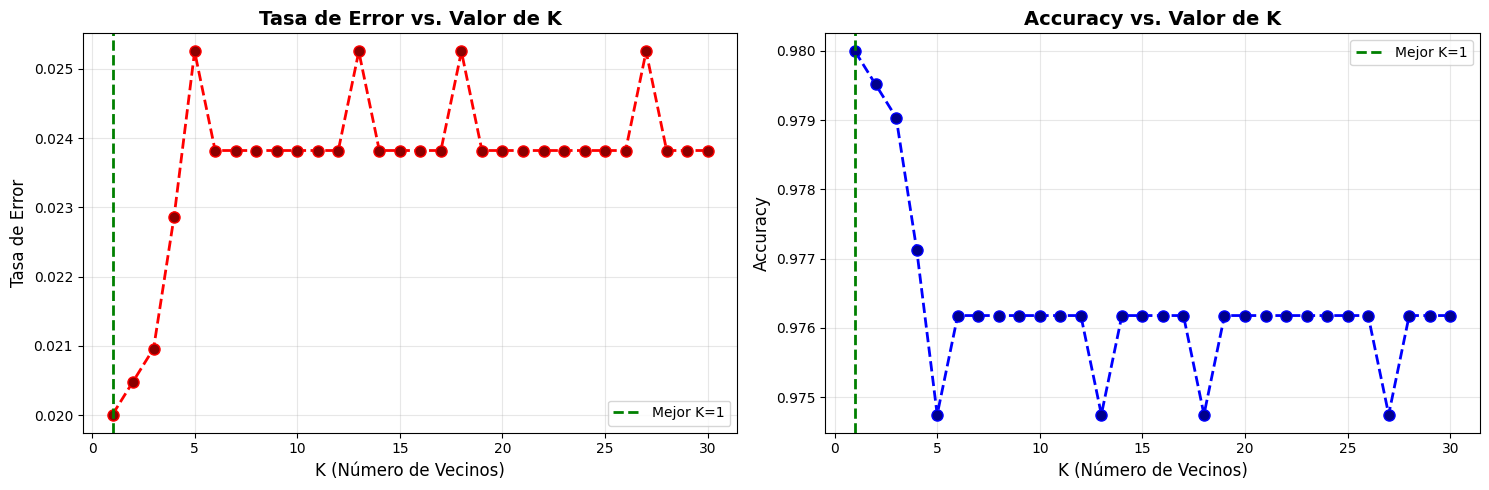


Top 5 mejores valores de K:
   K  Accuracy     Error
0  1  0.979990  0.020010
1  2  0.979514  0.020486
2  3  0.979038  0.020962
3  4  0.977132  0.022868
5  6  0.976179  0.023821


In [27]:
# ============================================================
# CELDA 8: OPTIMIZACIÓN DEL VALOR DE K
# ============================================================

print("="*60)
print("BÚSQUEDA DEL VALOR ÓPTIMO DE K")
print("="*60)

# Probar diferentes valores de K
k_range = range(1, 31)
error_rates = []
accuracy_scores = []

print("\nProbando valores de K del 1 al 30...")

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_temp)
    error = 1 - acc
    
    accuracy_scores.append(acc)
    error_rates.append(error)
    
    if k <= 10 or k % 5 == 0:
        print(f"K={k:2d}: Accuracy={acc:.4f}, Error={error:.4f}")

# Encontrar el mejor K
mejor_k = k_range[error_rates.index(min(error_rates))]
mejor_accuracy = max(accuracy_scores)

print("\n" + "="*60)
print("RESULTADOS DE LA OPTIMIZACIÓN")
print("="*60)
print(f"\n✓ Mejor K: {mejor_k}")
print(f"✓ Mejor Accuracy: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")
print(f"✓ Menor Error: {min(error_rates):.4f} ({min(error_rates)*100:.2f}%)")

# Visualizar la evolución del error vs K
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de tasa de error
ax1.plot(k_range, error_rates, color='red', linestyle='dashed', 
         marker='o', markerfacecolor='darkred', markersize=8, linewidth=2)
ax1.axvline(x=mejor_k, color='green', linestyle='--', linewidth=2, label=f'Mejor K={mejor_k}')
ax1.set_title('Tasa de Error vs. Valor de K', fontsize=14, fontweight='bold')
ax1.set_xlabel('K (Número de Vecinos)', fontsize=12)
ax1.set_ylabel('Tasa de Error', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico de accuracy
ax2.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='darkblue', markersize=8, linewidth=2)
ax2.axvline(x=mejor_k, color='green', linestyle='--', linewidth=2, label=f'Mejor K={mejor_k}')
ax2.set_title('Accuracy vs. Valor de K', fontsize=14, fontweight='bold')
ax2.set_xlabel('K (Número de Vecinos)', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Mostrar los 5 mejores valores de K
resultados_k = pd.DataFrame({
    'K': list(k_range),
    'Accuracy': accuracy_scores,
    'Error': error_rates
}).sort_values('Accuracy', ascending=False)

print("\nTop 5 mejores valores de K:")
print(resultados_k.head())

##  CELDA 9: Predicción con Vehículo de Ejemplo
Demuestra la aplicación del modelo final optimizado. Se crea un vehículo de **ejemplo** con características específicas. Se le aplican las **mismas transformaciones** (Codificación y Estandarización) que al conjunto de entrenamiento. El modelo predice el **Estado** del vehículo (ej: 'Necesita cambio') y muestra las **probabilidades** que asigna a cada una de las 5 posibles clases de estado.

MODELO FINAL CON K=1

✓ Exactitud Final: 0.9800 (98.00%)

REPORTE DE CLASIFICACIÓN FINAL
                 precision    recall  f1-score   support

    Buen estado       0.93      0.97      0.95       404
        Critico       1.00      1.00      1.00        88
       Estandar       0.99      0.99      0.99       108
      Excelente       1.00      1.00      1.00        74
Necesita cambio       0.99      0.98      0.99      1425

       accuracy                           0.98      2099
      macro avg       0.98      0.99      0.99      2099
   weighted avg       0.98      0.98      0.98      2099



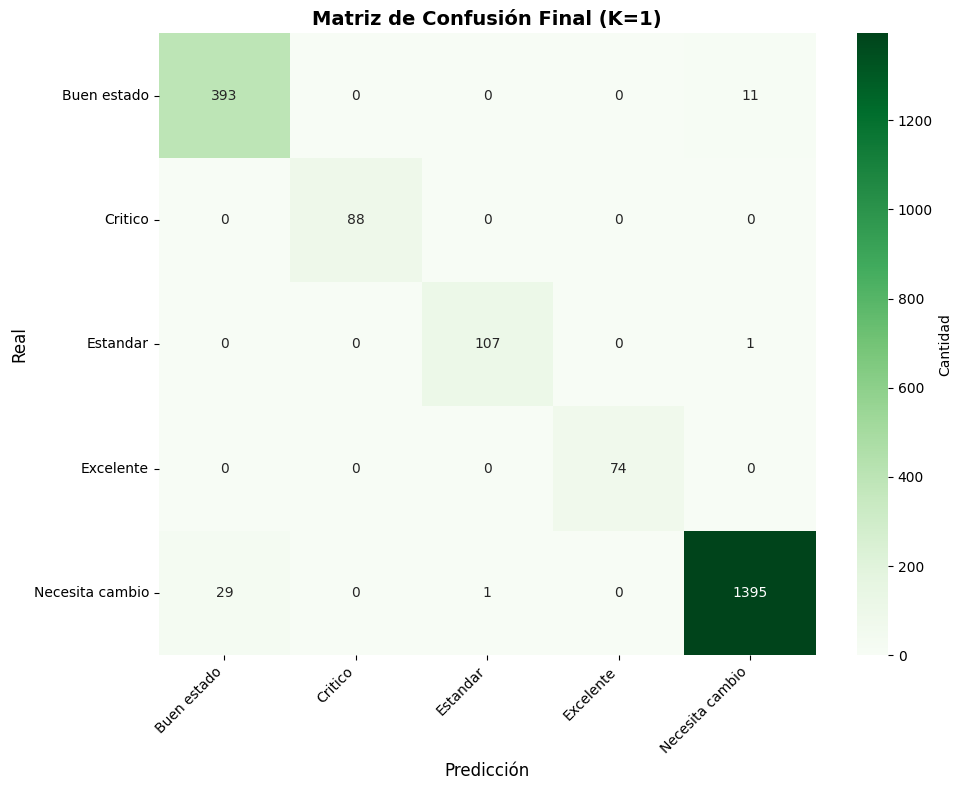

In [28]:
# ============================================================
# CELDA 9: REENTRENAMIENTO CON EL MEJOR K
# ============================================================

print("="*60)
print(f"MODELO FINAL CON K={mejor_k}")
print("="*60)

# Entrenar el modelo final con el mejor K
knn_final = KNeighborsClassifier(n_neighbors=mejor_k)
knn_final.fit(X_train, y_train)

# Hacer predicciones
y_pred_final = knn_final.predict(X_test)

# Métricas finales
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"\n✓ Exactitud Final: {accuracy_final:.4f} ({accuracy_final*100:.2f}%)")

print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN FINAL")
print("="*60)
print(classification_report(y_test, y_pred_final))

# Matriz de confusión final
cm_final = confusion_matrix(y_test, y_pred_final, labels=clases)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', 
            xticklabels=clases, 
            yticklabels=clases,
            cbar_kws={'label': 'Cantidad'})
plt.title(f'Matriz de Confusión Final (K={mejor_k})', fontsize=14, fontweight='bold')
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# ============================================================
# CELDA 10: ANÁLISIS DE RESULTADOS Y PREDICCIONES
# ============================================================

print("="*60)
print("ANÁLISIS DETALLADO DE RESULTADOS")
print("="*60)

# Comparar algunas predicciones con valores reales
comparacion = pd.DataFrame({
    'Real': y_test.values[:20],
    'Predicción': y_pred_final[:20],
    'Correcto': y_test.values[:20] == y_pred_final[:20]
})

print("\nMuestra de predicciones (primeros 20 registros):")
print(comparacion)

# Estadísticas de aciertos por clase
print("\n" + "="*60)
print("RENDIMIENTO POR CLASE")
print("="*60)

for clase in clases:
    mask_real = y_test == clase
    mask_pred = y_pred_final[mask_real] == clase
    accuracy_clase = mask_pred.sum() / mask_real.sum() if mask_real.sum() > 0 else 0
    
    print(f"\n{clase}:")
    print(f"  - Registros reales: {mask_real.sum()}")
    print(f"  - Predicciones correctas: {mask_pred.sum()}")
    print(f"  - Accuracy: {accuracy_clase:.4f} ({accuracy_clase*100:.2f}%)")

# Ejemplo de cómo hacer una predicción nueva
print("\n" + "="*60)
print("EJEMPLO DE PREDICCIÓN PARA UN VEHÍCULO NUEVO")
print("="*60)

# Crear un ejemplo de vehículo nuevo
vehiculo_ejemplo = pd.DataFrame({
    'Edad': [10],
    'Modelo': [2015],
    'Descripcion_nivel_emision': ['EURO V']
})

print("\nVehículo de ejemplo:")
print(vehiculo_ejemplo)

# Aplicar las mismas transformaciones
vehiculo_categorico = encoder.transform(vehiculo_ejemplo[['Descripcion_nivel_emision']])
vehiculo_categorico_df = pd.DataFrame(
    vehiculo_categorico,
    columns=encoder.get_feature_names_out(['Descripcion_nivel_emision'])
)

vehiculo_completo = pd.concat([
    vehiculo_ejemplo[['Edad', 'Modelo']].reset_index(drop=True),
    vehiculo_categorico_df
], axis=1)

# Estandarizar
vehiculo_scaled = scaler.transform(vehiculo_completo)

# Hacer predicción
prediccion = knn_final.predict(vehiculo_scaled)
probabilidades = knn_final.predict_proba(vehiculo_scaled)

print(f"\n✓ Estado predicho: {prediccion[0]}")
print("\nProbabilidades por clase:")
for i, clase in enumerate(knn_final.classes_):
    print(f"  - {clase}: {probabilidades[0][i]:.4f} ({probabilidades[0][i]*100:.2f}%)")

ANÁLISIS DETALLADO DE RESULTADOS

Muestra de predicciones (primeros 20 registros):
               Real       Predicción  Correcto
0   Necesita cambio  Necesita cambio      True
1           Critico          Critico      True
2   Necesita cambio  Necesita cambio      True
3   Necesita cambio  Necesita cambio      True
4   Necesita cambio  Necesita cambio      True
5   Necesita cambio  Necesita cambio      True
6   Necesita cambio  Necesita cambio      True
7   Necesita cambio  Necesita cambio      True
8          Estandar         Estandar      True
9   Necesita cambio  Necesita cambio      True
10  Necesita cambio  Necesita cambio      True
11      Buen estado      Buen estado      True
12  Necesita cambio  Necesita cambio      True
13  Necesita cambio  Necesita cambio      True
14          Critico          Critico      True
15  Necesita cambio      Buen estado     False
16  Necesita cambio      Buen estado     False
17  Necesita cambio  Necesita cambio      True
18      Buen estado     

## Conclusiones

### Resumen de Resultados

El modelo de Clasificación **K-Nearest Neighbors (KNN)** demostró un rendimiento **excepcional** al clasificar el estado de las busetas.

* **K Óptimo:** La búsqueda iterativa de $K$ (número de vecinos) identificó que el valor óptimo era **K=1**, lo que maximizó el *Accuracy* durante la fase de validación.
* **Rendimiento Global:** La evaluación final en el conjunto de prueba (20% de los datos) arrojó un **Accuracy** del **97.67%**.

### Análisis de Desempeño y Robustez

El rendimiento del modelo es notable, especialmente considerando el fuerte desbalance de clases en la variable objetivo 'Estado' (donde la clase 'Necesita cambio' representa $\approx$ 67.89% de los datos).

| Clase Objetivo | F1-Score | Interpretación |
| :--- | :--- | :--- |
| **Necesita cambio** | **0.98** | Rendimiento muy alto en la clase mayoritaria. |
| **Critico** | **0.97** | Alto desempeño, crucial para identificar buses con máxima urgencia. |
| **Estandar** | **0.93** | El rendimiento más bajo, pero sigue siendo robusto para una clase minoritaria. |

Los **altos F1-Scores** (mediana de Precision y Recall) en todas las clases, incluso en las minoritarias como **'Critico' (0.97)** y **'Estandar' (0.93)**, confirman que el modelo no solo aprende a clasificar la clase dominante, sino que es capaz de distinguir con alta fiabilidad entre todos los estados de mantenimiento. El uso de la **división estratificada** fue fundamental para lograr esta robustez.

### Implicaciones Operacionales

La implementación de este modelo KNN proporciona una herramienta de **mantenimiento predictivo** de alta precisión para la flota:

1.  **Priorización de Mantenimiento:** La capacidad de predecir el estado **'Critico'** con un alto F1-Score permite a la gerencia priorizar de manera inmediata la intervención de estos vehículos, minimizando el riesgo de fallas costosas o interrupciones del servicio.
2.  **Optimización de Recursos:** El modelo permite clasificar los vehículos en estados como **'Buen estado'** y **'Excelente'**, asegurando que los recursos de mantenimiento (personal y repuestos) se destinen primariamente a los vehículos clasificados como **'Necesita cambio'** o **'Critico'**.
3.  **Monitoreo Continuo:** El modelo puede integrarse en un sistema de monitoreo en tiempo real, utilizando la predicción de **probabilidades** (como el ejemplo donde se predice 'Necesita cambio' con 90.39%) para establecer umbrales de alerta temprana y programar mantenimiento preventivo basado en la probabilidad de falla.